<a href="https://colab.research.google.com/github/yash-hash/Project/blob/master/Titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [182]:
# Importing the Libraries
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [183]:
train = pd.read_csv('train.csv')

# Visualising Data
print(train.info()) # total information about the passengers
print(train.head()) # top 5 values of dataframe
print(train.describe()) #statiscal data analysis
print(train.count()) 
print(train.columns.tolist())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   N

In [184]:
# Count of Female
train[train['Sex'].str.match('female')].count()

PassengerId    314
Survived       314
Pclass         314
Name           314
Sex            314
Age            261
SibSp          314
Parch          314
Ticket         314
Fare           314
Cabin           97
Embarked       312
dtype: int64

In [185]:
# Count of Male
train[train['Sex'].str.match('male')].count()

PassengerId    577
Survived       577
Pclass         577
Name           577
Sex            577
Age            453
SibSp          577
Parch          577
Ticket         577
Fare           577
Cabin          107
Embarked       577
dtype: int64

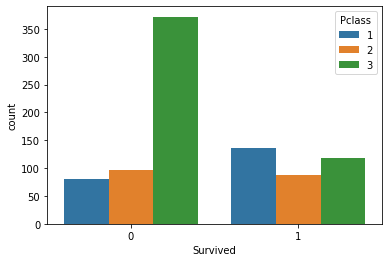

In [186]:
# People survived by class
sns.countplot(x='Survived', hue ='Pclass', data=train)

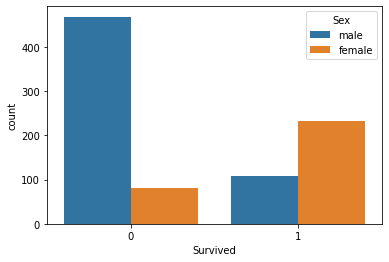

In [187]:
# People survived by Sex
sns.countplot(x="Survived", hue="Sex",data=train)

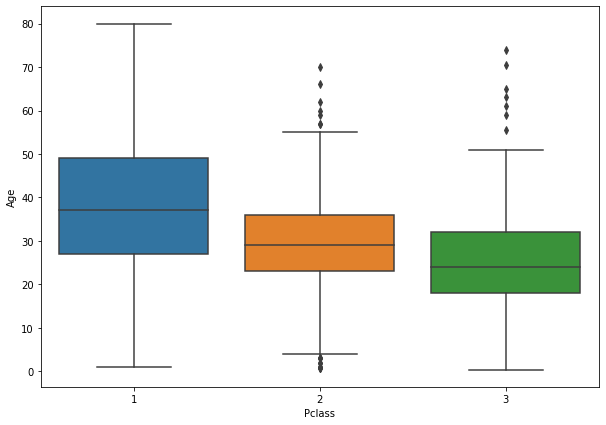

In [188]:
#function for imputing ages regarding the corresponding age average per class

def add_age(cols):
  Age = cols[0]
  Pclass = cols[1]
  if pd.isnull(Age):
    return int(train[train["Pclass"] == Pclass]["Age"].mean())
  else:
    return Age
plt.figure(figsize=(10,7))
sns.boxplot(x = "Pclass",y="Age",data=train)

In [189]:
#Calling the Funciton
train["Age"] = train[["Age","Pclass"]].apply(add_age,axis=1)
print(train["Age"])

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64


In [190]:
# Data Deletion for incomplete values
train.drop('Cabin', axis=1 ,inplace=True)
train.dropna(inplace=True)
#train.dropna(inplace=True) #Removing rows with null values

In [191]:
# Creating 2 columns, one for female & one for male
pd.get_dummies(train["Sex"])
sex = pd.get_dummies(train["Sex"],drop_first=True)

# Same for Embarked & Pclass
embarked = pd.get_dummies(train["Embarked"],drop_first=True)
Pclass = pd.get_dummies(train["Pclass"],drop_first=True)

In [192]:
# Adding variables to the Dataset
train = pd.concat([train,Pclass,sex,embarked],axis=1)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,2,3,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,0,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,S,0,1,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0,0,1,0,0


In [193]:
# Removing columns we are going to use for our model
train = train.drop(["PassengerId","Pclass","Name","Sex","Ticket","Embarked",],axis=1)

In [194]:
# Model creation
# x contains all the features
# y contains the target values
x = train.drop("Survived",axis=1)
y = train["Survived"]

In [195]:
# Splitting the data into training & Testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 101)

In [196]:
# Training the model using LogisticRegression
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [197]:
#Checking the model prediction
predictions = logmodel.predict(x_test)
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions)*100)

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.68      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267

[[150  13]
 [ 33  71]]
82.77153558052434
